In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import pymysql
import pandas as pd

# Connect to MySQL
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='1618',
    database='world_layoffs'
)

# Execute the query
query = "SELECT * FROM layoffs_staging2;"
layoffs_data = pd.read_sql(query, connection)

# Close the connection
connection.close()

# Save the data to a CSV file
layoffs_data.to_csv('layoffs_cleaned.csv', index=False)


In [3]:
# Load the data
layoffs_data = pd.read_csv('layoffs_cleaned.csv')

In [4]:
layoffs_data

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Included Health,SF Bay Area,Healthcare,NaN,0.06,2022-07-25,Series E,United States,272.0
1,&Open,Dublin,Marketing,9.0,0.09,2022-11-17,Series A,Ireland,35.0
2,#Paid,Toronto,Marketing,19.0,0.17,2023-01-27,Series B,Canada,21.0
3,100 Thieves,Los Angeles,Consumer,12.0,NaN,2022-07-13,Series C,United States,120.0
4,10X Genomics,SF Bay Area,Healthcare,100.0,0.08,2022-08-04,Post-IPO,United States,242.0
...,...,...,...,...,...,...,...,...,...
1990,Zwift,Los Angeles,Fitness,150.0,NaN,2022-05-12,Series C,United States,619.0
1991,Zymergen,SF Bay Area,Other,80.0,NaN,2022-07-25,Acquired,United States,974.0
1992,Zymergen,SF Bay Area,Other,80.0,NaN,2022-08-26,Acquired,United States,974.0
1993,Zymergen,SF Bay Area,Other,120.0,NaN,2021-09-23,Post-IPO,United States,974.0


In [5]:
layoffs_data.sample(5)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
1026,Mainstreet,SF Bay Area,Finance,45.0,0.30,2022-05-04,Series A,United States,64.0
343,Cisco,SF Bay Area,Infrastructure,4100.0,0.05,2022-11-16,Post-IPO,United States,2.0
822,Instamojo,Bengaluru,Finance,6.0,0.06,2020-04-02,Unknown,India,8.0
1114,NanoString,Seattle,Healthcare,NaN,0.10,2022-11-08,Post-IPO,United States,731.0
365,Clutch,Toronto,Transportation,76.0,0.22,2022-06-29,Series B,Canada,153.0


In [7]:
# Summary statistics
layoffs_data.describe()

,total_laid_off,percentage_laid_off,funds_raised_millions
count,1617.000000,1572.000000,1830.000000
mean,237.265925,0.258033,875.109290
std,769.807209,0.255875,6024.144522
min,3.000000,0.000000,0.000000
25%,36.000000,0.100000,51.000000
50%,80.000000,0.170000,162.500000
75%,180.000000,0.300000,450.750000
max,12000.000000,1.000000,121900.000000


In [8]:
layoffs_data.shape

(1995, 9)

In [9]:
layoffs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company                1995 non-null   object 
 1   location               1995 non-null   object 
 2   industry               1994 non-null   object 
 3   total_laid_off         1617 non-null   float64
 4   percentage_laid_off    1572 non-null   float64
 5   date                   1994 non-null   object 
 6   stage                  1990 non-null   object 
 7   country                1995 non-null   object 
 8   funds_raised_millions  1830 non-null   float64
dtypes: float64(3), object(6)
memory usage: 140.4+ KB


In [10]:
# Check for null values
print(layoffs_data.isnull().sum())

company                    0
location                   0
industry                   1
total_laid_off           378
percentage_laid_off      423
date                       1
stage                      5
country                    0
funds_raised_millions    165
dtype: int64


In [11]:
# Converting date column to datetime
layoffs_data['date'] = pd.to_datetime(layoffs_data['date'])

In [12]:
layoffs_data.dtypes

company                          object
location                         object
industry                         object
total_laid_off                  float64
percentage_laid_off             float64
date                     datetime64[ns]
stage                            object
country                          object
funds_raised_millions           float64
dtype: object

In [13]:
# Handling missing values
# 1. 'industry': marked as 'Unknown'
layoffs_data['industry'] = layoffs_data['industry'].fillna('Unknown')

In [14]:
# 2. 'total_laid_off': Fill using median (robust to outliers)
layoffs_data['total_laid_off'].fillna(layoffs_data['total_laid_off'].median(), inplace=True)

In [15]:
numerical_cols = layoffs_data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    layoffs_data[col].fillna(layoffs_data[col].median(), inplace=True)
numerical_cols

Index(['total_laid_off', 'percentage_laid_off', 'funds_raised_millions'], dtype='object')


Missing Values in Each Column:
company                  0
location                 0
industry                 0
total_laid_off           0
percentage_laid_off      0
date                     1
stage                    5
country                  0
funds_raised_millions    0
dtype: int64


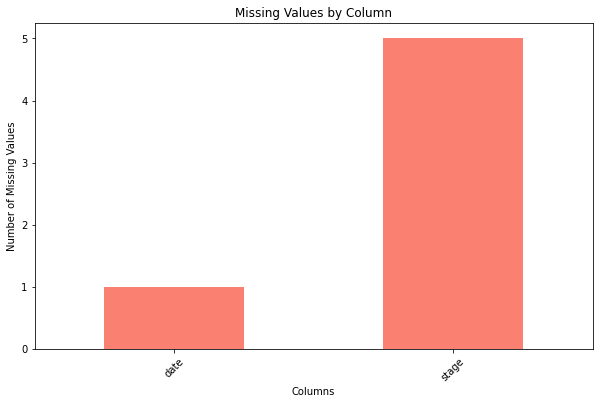

In [16]:
# Check for missing values
missing_values = layoffs_data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)

# Plot missing values
plt.figure(figsize=(10, 6))
missing_values[missing_values > 0].plot(kind='bar', color='salmon')
plt.title("Missing Values by Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45)
plt.show()


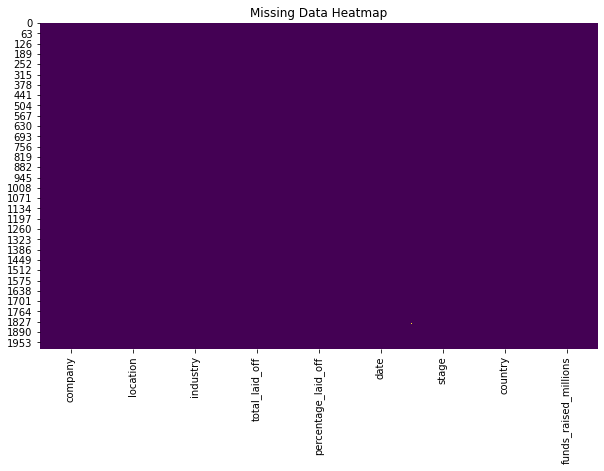

In [17]:
# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(layoffs_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [18]:
 layoffs_data['stage'].fillna('Unknown', inplace=True)


In [19]:
missing_date_row = layoffs_data[layoffs_data['date'].isnull()]
missing_date_row

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
186,Blackbaud,Charleston,Other,500.0,0.14,NaT,Post-IPO,United States,162.5


In [20]:
print("Number of missing values in 'stage' after inference:", layoffs_data['stage'].isnull().sum())

Number of missing values in 'stage' after inference: 0


In [21]:
layoffs_data.isnull().sum()

company                  0
location                 0
industry                 0
total_laid_off           0
percentage_laid_off      0
date                     1
stage                    0
country                  0
funds_raised_millions    0
dtype: int64

In [22]:
layoffs_data['date'] = pd.to_datetime(layoffs_data['date'], errors='coerce')
layoffs_data['date'].fillna(pd.Timestamp('2023-02-14'), inplace=True)


In [23]:
layoffs_data.isnull().sum()

company                  0
location                 0
industry                 0
total_laid_off           0
percentage_laid_off      0
date                     0
stage                    0
country                  0
funds_raised_millions    0
dtype: int64

In [25]:
layoffs_data[(layoffs_data['company'] == 'Blackbaud') & (layoffs_data['location'] == 'Charleston')]


,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
186,Blackbaud,Charleston,Other,500.0,0.14,2023-02-14,Post-IPO,United States,162.5


### Exploratory Data Analysis (EDA)

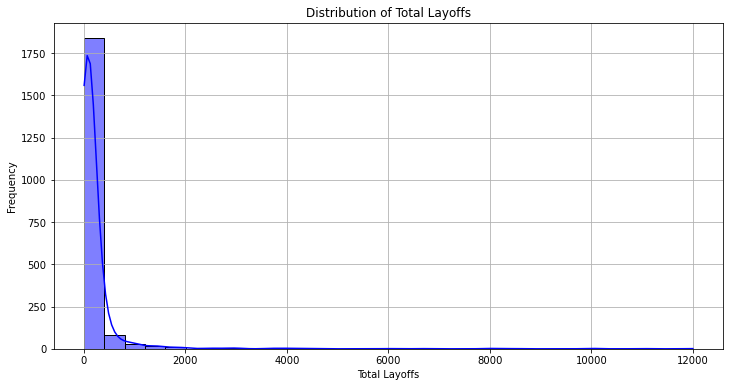

In [26]:
# Distribution of Total Layoffs

plt.figure(figsize=(12, 6))
sns.histplot(layoffs_data['total_laid_off'], bins=30, kde=True, color='blue')
plt.title("Distribution of Total Layoffs")
plt.xlabel("Total Layoffs")
plt.ylabel("Frequency")
plt.grid()
plt.show()

Insights from the Graph:

Skewness:

The distribution is highly right-skewed (positive skewness).
This means that most layoffs involve small to moderate values, but there are a few extreme cases with very large layoffs.

Concentration:

A significant majority of layoffs fall within the first few bins, indicating that most companies laid off relatively smaller numbers of employees.

Outliers:

The presence of a long tail (on the right side) indicates outliers with exceptionally large layoffs.

Density:

The KDE curve highlights the density peaks where layoffs are most frequent, and it smooths out the histogram's jaggedness.

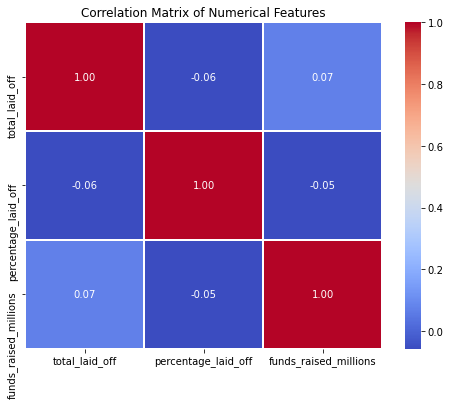

In [27]:
# Correlation Analysis
correlation_matrix = layoffs_data[['total_laid_off', 'percentage_laid_off', 'funds_raised_millions']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

###               Observations: 
   #### Total Layoffs and Funds Raised:

#### Correlation: 0.07 (weak positive correlation).
#### Implication: Companies with higher funding don't necessarily lay off more employees, but there may be some slight tendency.

####      Percentage Laid Off and Funds Raised:

#### Correlation: -0.05 (weak negative correlation).
#### Implication: Companies raising more funds tend to have slightly lower layoff percentages, but the relationship is negligible.

####      Total Layoffs and Percentage Laid Off:

#### Correlation: -0.06 (essentially no correlation).
#### Implication: The number of employees laid off doesn't strongly indicate the percentage laid off, likely because company sizes vary.

####  Insight: Weak correlation between funding and layoffs suggests layoffs are influenced by external factors.

### Layoff Trends Over Time

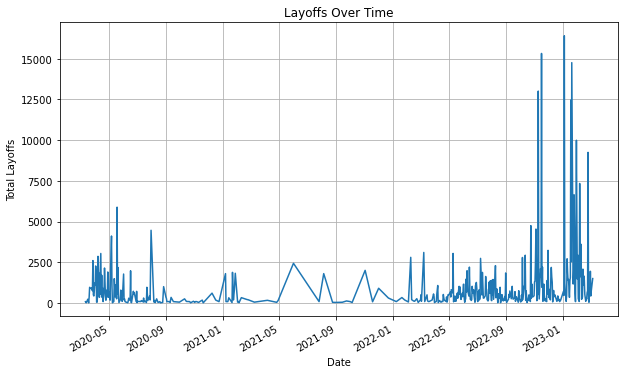

In [28]:
plt.figure(figsize=(10, 6))
layoffs_data.groupby('date')['total_laid_off'].sum().plot()
plt.title('Layoffs Over Time')
plt.xlabel('Date')
plt.ylabel('Total Layoffs')
plt.grid()
plt.show()

#### Insight: Significant spikes might align with industry-wide or macroeconomic events.

### Industry-Wise Layoffs

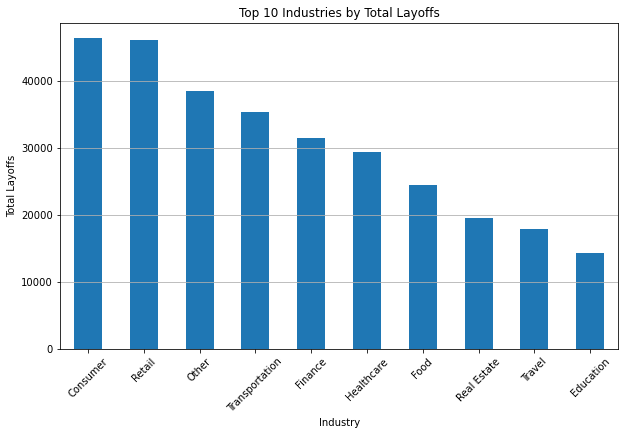

In [29]:
plt.figure(figsize=(10, 6))
layoffs_data.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Industries by Total Layoffs')
plt.xlabel('Industry')
plt.ylabel('Total Layoffs')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


#### Insight: Industries like Technology and Retail are most impacted.

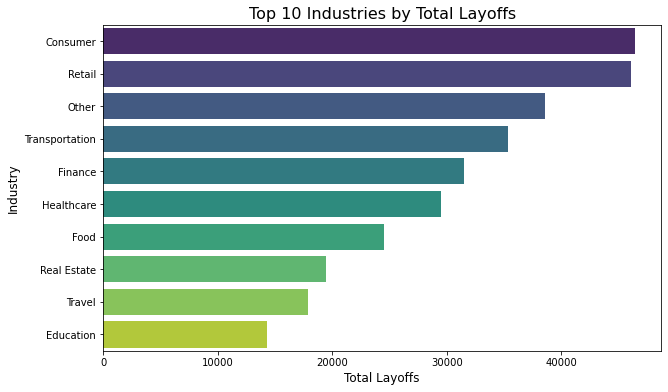

In [30]:
top_industries = layoffs_data.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_industries.values, y=top_industries.index, palette='viridis')
plt.title('Top 10 Industries by Total Layoffs', fontsize=16)
plt.xlabel('Total Layoffs', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.show()

### Country-Wise Layoffs

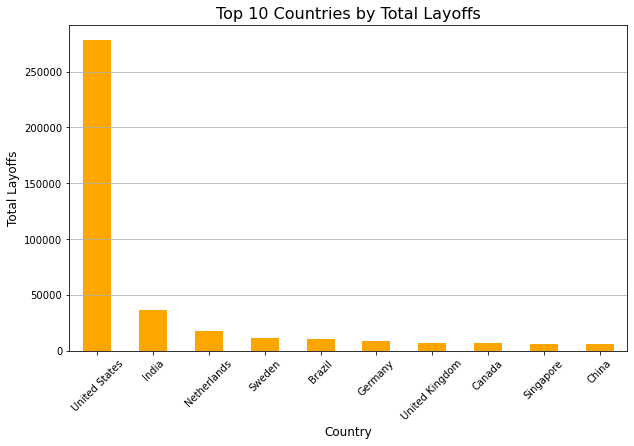

In [31]:
plt.figure(figsize=(10, 6))
layoffs_data.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Countries by Total Layoffs',fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Layoffs', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### Insight: The U.S. leads in layoffs, reflecting its large tech ecosystem.

### Layoffs by Stage

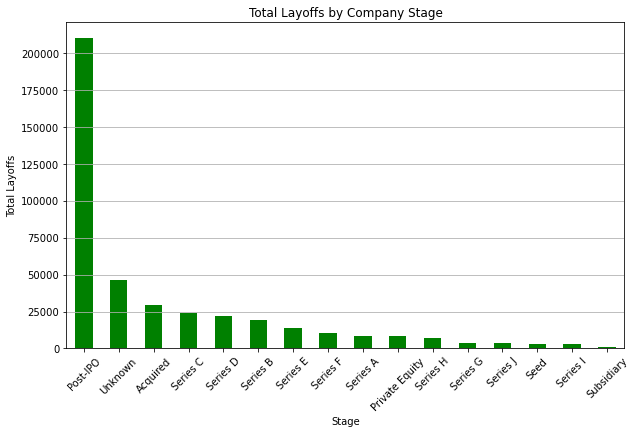

In [32]:
plt.figure(figsize=(10, 6))
layoffs_data.groupby('stage')['total_laid_off'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Total Layoffs by Company Stage')
plt.xlabel('Stage')
plt.ylabel('Total Layoffs')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### Insight: Post-IPO stage companies experienced the most layoffs, indicating potential scaling challenges.
####               Mature companies (e.g., "Post-IPO") account for a large proportion of layoffs, but startups (e.g., "Series B") are also                                significantly affected.

In [33]:
print(layoffs_data['stage'].value_counts())
print(layoffs_data.groupby('stage')['total_laid_off'].sum())

Post-IPO          382
Unknown           320
Series B          260
Series C          249
Series D          203
Series A          144
Acquired          134
Series E          107
Series F           58
Seed               54
Private Equity     31
Series H           21
Series G           13
Series I            7
Series J            7
Subsidiary          5
Name: stage, dtype: int64
stage
Acquired           29096.0
Post-IPO          210052.0
Private Equity      8357.0
Seed                3316.0
Series A            8478.0
Series B           19391.0
Series C           23777.0
Series D           22025.0
Series E           13897.0
Series F           10652.0
Series G            3857.0
Series H            7244.0
Series I            2855.0
Series J            3570.0
Subsidiary          1094.0
Unknown            46238.0
Name: total_laid_off, dtype: float64


In [34]:
layoffs_per_company = layoffs_data.groupby('stage')['total_laid_off'].sum() / layoffs_data['stage'].value_counts()
print(layoffs_per_company.sort_values(ascending=False))


Post-IPO          549.874346
Series J          510.000000
Series I          407.857143
Series H          344.952381
Series G          296.692308
Private Equity    269.580645
Subsidiary        218.800000
Acquired          217.134328
Series F          183.655172
Unknown           144.493750
Series E          129.878505
Series D          108.497537
Series C           95.489960
Series B           74.580769
Seed               61.407407
Series A           58.875000
dtype: float64


In [35]:
unknown_data = layoffs_data[layoffs_data['stage'] == 'Unknown']
unknown_data.head()


,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
6,2TM,Sao Paulo,Crypto,90.0,0.12,2022-06-01,Unknown,Brazil,250.0
7,2TM,Sao Paulo,Crypto,100.0,0.15,2022-09-01,Unknown,Brazil,250.0
12,80 Acres Farms,Cincinnati,Food,80.0,0.10,2023-01-18,Unknown,United States,275.0
20,Acko,Mumbai,Finance,45.0,0.09,2020-04-01,Unknown,India,143.0
21,Acorns,Portland,Finance,50.0,0.17,2020-05-26,Unknown,United States,207.0


### Monthly Layoff Trends

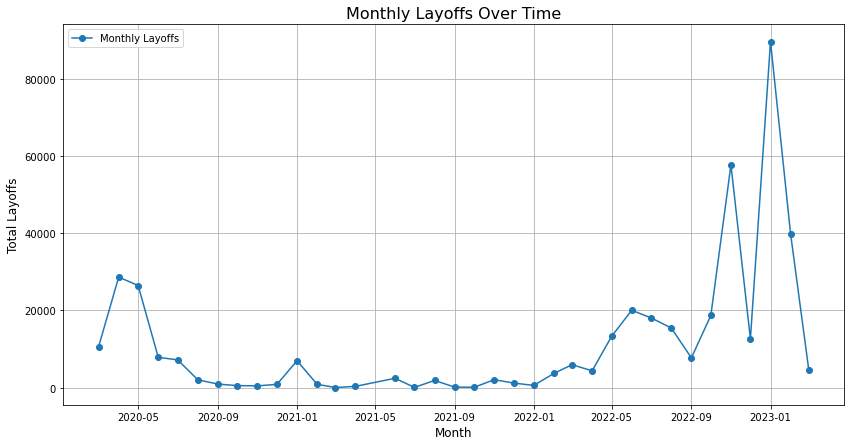

In [36]:
layoffs_per_month = layoffs_data.groupby(layoffs_data['date'].dt.to_period('M'))['total_laid_off'].sum()

plt.figure(figsize=(14, 7))
plt.plot(layoffs_per_month.index.to_timestamp(), layoffs_per_month.values, marker='o', label='Monthly Layoffs')
plt.title('Monthly Layoffs Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Layoffs', fontsize=12)
plt.grid()
plt.legend()
plt.show()

#### Insight: Helps understand seasonality in layoffs, e.g., Q4 spikes.

###  Yearly trends

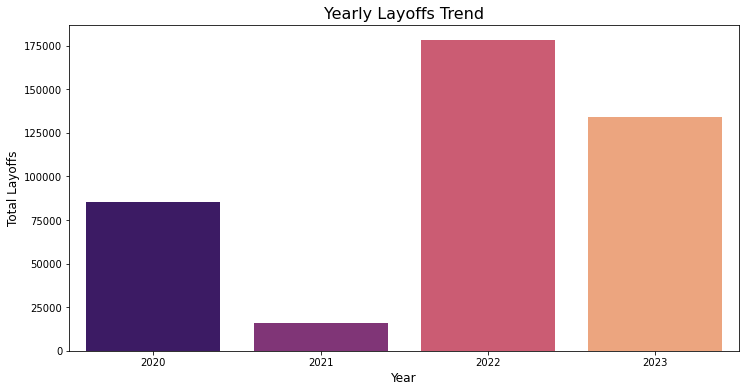

In [37]:
layoffs_data['year'] = layoffs_data['date'].dt.year
yearly_layoffs = layoffs_data.groupby('year')['total_laid_off'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_layoffs.index, y=yearly_layoffs.values, palette='magma')
plt.title('Yearly Layoffs Trend', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Layoffs', fontsize=12)
plt.show()

### Companies with the highest layoffs


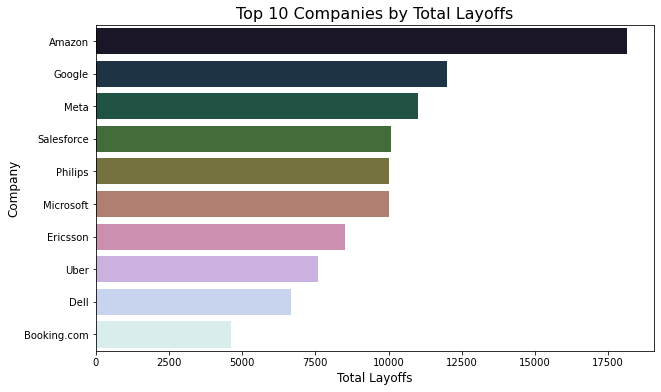

In [38]:
top_companies = layoffs_data.groupby('company')['total_laid_off'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='cubehelix')
plt.title('Top 10 Companies by Total Layoffs', fontsize=16)
plt.xlabel('Total Layoffs', fontsize=12)
plt.ylabel('Company', fontsize=12)
plt.show()

### Relationship between Funding and Layoffs

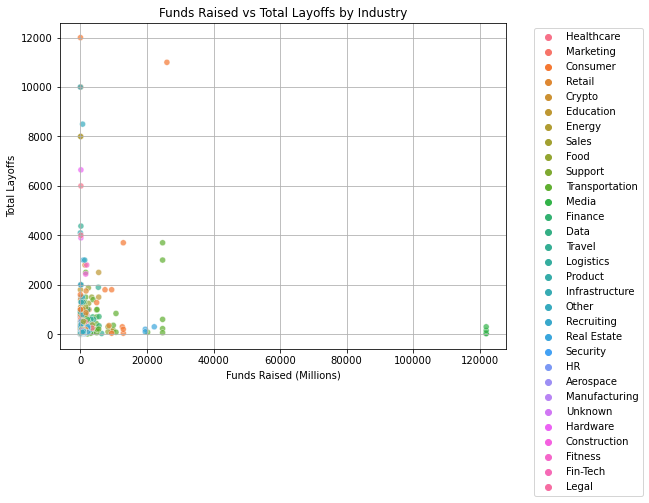

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='funds_raised_millions', y='total_laid_off', data=layoffs_data, hue='industry', alpha=0.7)
plt.title('Funds Raised vs Total Layoffs by Industry')
plt.xlabel('Funds Raised (Millions)')
plt.ylabel('Total Layoffs')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

#### Insight: Funding levels don’t strongly predict layoffs; external factors might play a bigger role.

#### Funding vs. Percentage of Layoffs

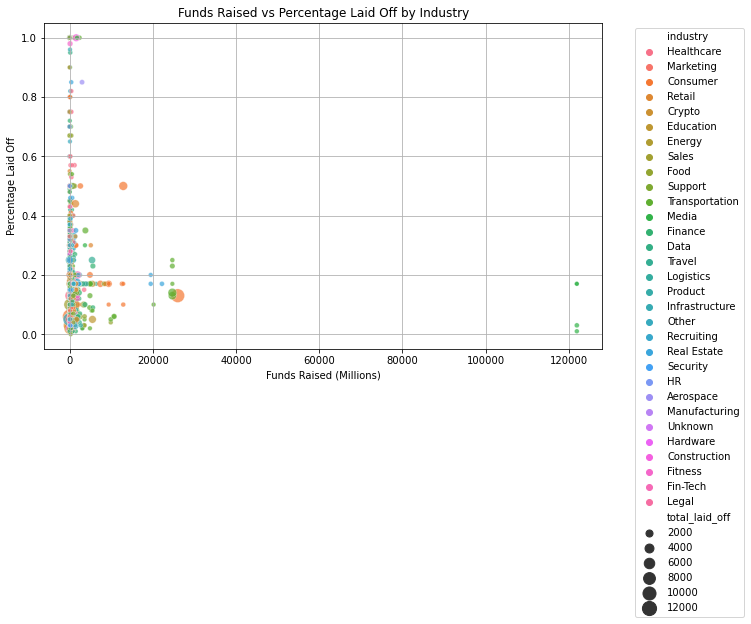

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='funds_raised_millions',
    y='percentage_laid_off',
    hue='industry',
    size='total_laid_off',
    sizes=(20, 200),
    data=layoffs_data,
    alpha=0.7
)
plt.title('Funds Raised vs Percentage Laid Off by Industry')
plt.xlabel('Funds Raised (Millions)')
plt.ylabel('Percentage Laid Off')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

#### Insight: Certain industries show high layoffs despite substantial funding, suggesting inefficiencies.

In [41]:
from scipy.stats import pearsonr

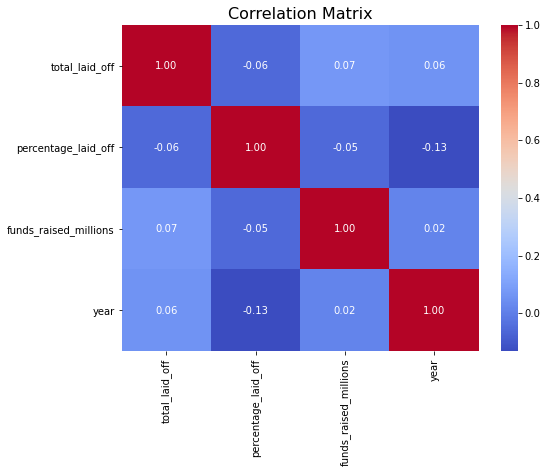

Correlation between funds raised and total layoffs: 0.07


In [42]:
# Correlation heatmap
correlation_matrix = layoffs_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# Specific correlation: layoffs vs. funds raised
corr, _ = pearsonr(layoffs_data['funds_raised_millions'], layoffs_data['total_laid_off'])
print(f"Correlation between funds raised and total layoffs: {corr:.2f}")


### Interactive Analysis: Pivot by Industry and Stage

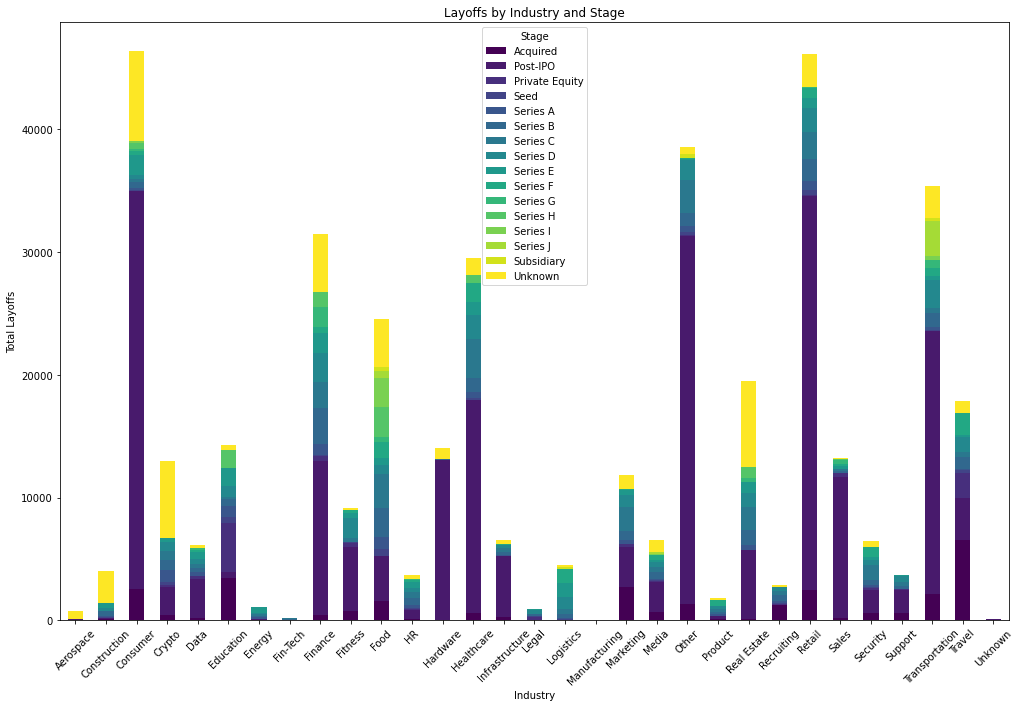

In [43]:
pivot_table = layoffs_data.pivot_table(
    values='total_laid_off',
    index='industry',
    columns='stage',
    aggfunc='sum',
    fill_value=0
)
pivot_table.plot(kind='bar', stacked=True, figsize=(17, 11), colormap='viridis')
plt.title('Layoffs by Industry and Stage')
plt.xlabel('Industry')
plt.ylabel('Total Layoffs')
plt.xticks(rotation=45)
plt.legend(title='Stage')
plt.show()

#### # Insight: Stacked bar chart highlights layoffs across stages within industries.

###  Distribution of layoff percentages

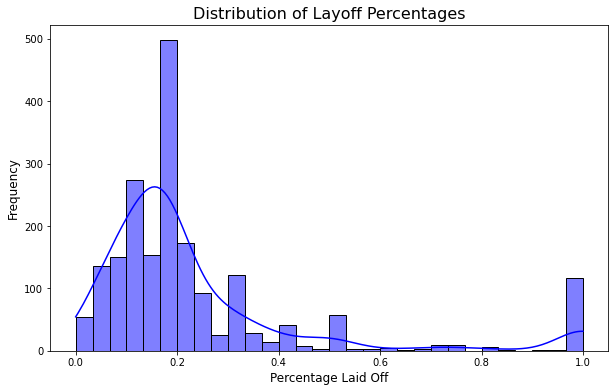

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(layoffs_data['percentage_laid_off'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Layoff Percentages', fontsize=16)
plt.xlabel('Percentage Laid Off', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Key Observations
Peak Around Low Percentages:

There is a significant peak near the lower end of the distribution (e.g., around 5-10%). This suggests that many companies laid off a small percentage of their workforce, likely less than 15%.
Long Right Tail:

The graph extends to the right, indicating that a few companies laid off a high percentage of their workforce (e.g., 50% or more). These are outliers and may represent companies undergoing severe financial trouble or closure.
Secondary Spike:

Toward the far right, there’s another spike at a high percentage. This could represent companies that laid off nearly all their employees (e.g., 90-100%), possibly due to bankruptcy or liquidation.
Skewness:

The distribution is right-skewed, meaning most layoff percentages are small, but a few companies have very high percentages.
KDE Curve:

The smooth blue curve (Kernel Density Estimate) shows the general trend, highlighting where layoff percentages are most concentrated.

Inference:

Most Companies Have Small Layoffs:

A large number of companies seem to have opted for smaller layoffs (e.g., below 15%), suggesting they aimed for workforce optimization without drastically affecting operations.
A Few Extreme Cases:

The tail and the spike on the far right indicate that some companies had extreme layoffs, possibly due to:
Financial distress.
Complete shutdowns.
Structural changes (e.g., mergers or acquisitions).

In [45]:
layoffs_data.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions,year
0,Included Health,SF Bay Area,Healthcare,80.0,0.06,2022-07-25,Series E,United States,272.0,2022
1,&Open,Dublin,Marketing,9.0,0.09,2022-11-17,Series A,Ireland,35.0,2022
2,#Paid,Toronto,Marketing,19.0,0.17,2023-01-27,Series B,Canada,21.0,2023
3,100 Thieves,Los Angeles,Consumer,12.0,0.17,2022-07-13,Series C,United States,120.0,2022
4,10X Genomics,SF Bay Area,Healthcare,100.0,0.08,2022-08-04,Post-IPO,United States,242.0,2022


In [46]:
# Grouping by 'industry' and 'year' and summing 'total_laid_off'
industry_trends = layoffs_data.groupby(['industry', 'year'])['total_laid_off'].sum().reset_index()

# Filtering for top industries
top_industries_set = set(top_industries.index)
layoffs_data2 = industry_trends[industry_trends['industry'].isin(top_industries_set)]


In [47]:
layoffs_data2

,industry,year,total_laid_off
6,Consumer,2020,6223.0
7,Consumer,2021,3600.0
8,Consumer,2022,20416.0
9,Consumer,2023,16143.0
17,Education,2020,685.0
18,Education,2021,1943.0
19,Education,2022,9448.0
20,Education,2023,2222.0
25,Finance,2020,8944.0
26,Finance,2021,160.0


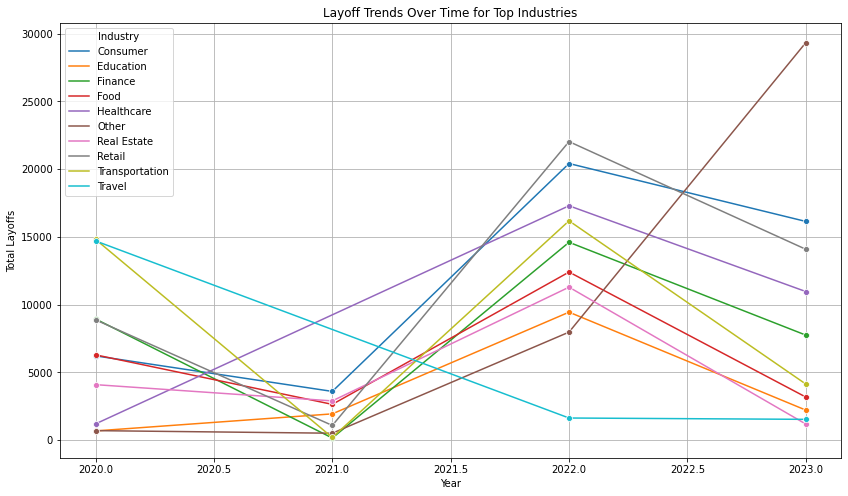

In [48]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=layoffs_data2, x='year', y='total_laid_off', hue='industry', marker='o')

plt.title('Layoff Trends Over Time for Top Industries')
plt.xlabel('Year')
plt.ylabel('Total Layoffs')
plt.legend(title='Industry')
plt.grid(True)
plt.show()


A sudden increase in layoffs for an industry might indicate economic challenges or crises in that sector.

layoffs decline over time, it may suggest recovery or improved industry stability.

Transportation (light blue) and Travel (cyan) experienced higher layoffs initially but showed a noticeable decline in recent years.
This trend likely reflects some recovery post-pandemic when these industries were heavily impacted by restrictions.
Transportation remains steady in the final years, indicating stabilization.

Real Estate (purple) and Retail (red) display a steady yet concerning trend, as layoffs have been relatively high across all years without extreme surges or declines.
This reflects ongoing challenges, possibly due to:
Economic downturns.
Shifts in business models (e.g., e-commerce replacing physical retail).

Finance (green) and Food (yellow) industries show notable increases in layoffs mid-graph before declining in the final year.
These industries may have faced short-term economic pressures or restructuring events but appear to recover.

General Takeaways

"Other" Industry Surge: Represents a critical area of concern, indicating broad job losses in undefined sectors.

Recovery in Travel and Transportation: Reflects post-pandemic recovery as restrictions ease.

Retail and Real Estate Challenges: Persistent layoffs highlight structural challenges in these industries.

Healthcare Resilience: Low layoffs suggest stability despite broader economic fluctuations.

This graph provides a clear narrative of how different industries respond to economic, social, and global challenges over time.

In [49]:
# Rolling Average of Layoffs
layoffs_data_copy = layoffs_data.copy()
layoffs_data_copy['rolling_avg'] = layoffs_data_copy['total_laid_off'].rolling(window=3).mean()


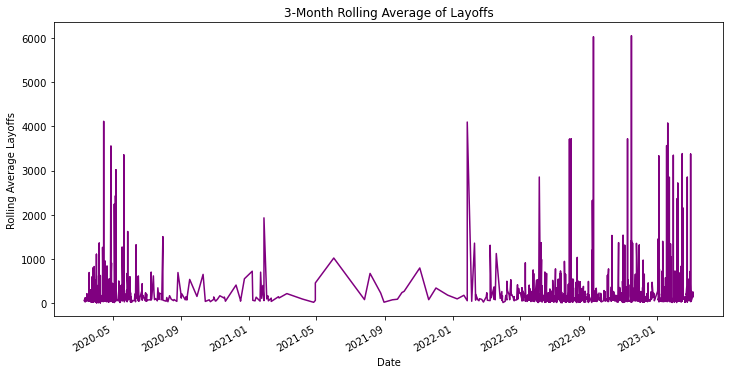

In [50]:
# Plot the rolling average
fig, ax = plt.subplots(figsize=(12, 6))
layoffs_data_copy.set_index('date')['rolling_avg'].plot(ax=ax, color='purple')
ax.set_title("3-Month Rolling Average of Layoffs")
ax.set_xlabel("Date")
ax.set_ylabel("Rolling Average Layoffs")

plt.show()


In [51]:
layoffs_data.columns

Index(['company', 'location', 'industry', 'total_laid_off',
       'percentage_laid_off', 'date', 'stage', 'country',
       'funds_raised_millions', 'year'],
      dtype='object')

In [52]:
layoffs_data

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions,year
0,Included Health,SF Bay Area,Healthcare,80.0,0.06,2022-07-25,Series E,United States,272.0,2022
1,&Open,Dublin,Marketing,9.0,0.09,2022-11-17,Series A,Ireland,35.0,2022
2,#Paid,Toronto,Marketing,19.0,0.17,2023-01-27,Series B,Canada,21.0,2023
3,100 Thieves,Los Angeles,Consumer,12.0,0.17,2022-07-13,Series C,United States,120.0,2022
4,10X Genomics,SF Bay Area,Healthcare,100.0,0.08,2022-08-04,Post-IPO,United States,242.0,2022
...,...,...,...,...,...,...,...,...,...,...
1990,Zwift,Los Angeles,Fitness,150.0,0.17,2022-05-12,Series C,United States,619.0,2022
1991,Zymergen,SF Bay Area,Other,80.0,0.17,2022-07-25,Acquired,United States,974.0,2022
1992,Zymergen,SF Bay Area,Other,80.0,0.17,2022-08-26,Acquired,United States,974.0,2022
1993,Zymergen,SF Bay Area,Other,120.0,0.17,2021-09-23,Post-IPO,United States,974.0,2021


### Key Insights 
funds_raised_millions is the most influential feature.
Companies raising significant funds are likely to undergo significant restructuring or layoffs.

Post-IPO Stage:
Layoffs are prominent in companies that are in the Post-IPO stage. This suggests companies may streamline operations after going public.

Industries and Countries:
Certain industries like Consumer, and certain countries like the Netherlands and Sweden, play an outsized role in layoffs. Further investigation into these trends may yield actionable insights.

Smaller countries (e.g., Netherlands) with fewer data points might appear important if layoffs there were consistent or extreme in value.

Meanwhile, the United States (which dominates layoffs) might spread its influence across many rows, diluting its perceived importance.